In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
enrolment = pd.DataFrame(columns=['Region', 'total_Enr', 'Year'])

In [3]:
census = pd.read_excel('shared_data_read_only/Data/AfriKids/ExternalReports/GES_EMIS/Census Data.xlsx', sheet_name='Enrolment_2016_2017')
filtered_data = census.loc[(census['Region']=='UPPER EAST')|(census['Region']=='UPPER WEST'),
                       ['Region',
                        'P1B_Enr', 'P1G_Enr', 'P2B_Enr', 'P2G_Enr', 'P3B_Enr', 'P3G_Enr',
                        'P4B_Enr', 'P4G_Enr', 'P5B_Enr', 'P5G_Enr', 'P6B_Enr', 'P6G_Enr']]
filtered_data['total_Enr'] = filtered_data[
    ['P1B_Enr', 'P1G_Enr', 'P2B_Enr', 'P2G_Enr', 'P3B_Enr', 'P3G_Enr',
     'P4B_Enr', 'P4G_Enr', 'P5B_Enr', 'P5G_Enr', 'P6B_Enr', 'P6G_Enr']
    ].sum(axis=1)
filtered_data.drop(columns=['P1B_Enr', 'P1G_Enr', 'P2B_Enr', 'P2G_Enr', 'P3B_Enr', 'P3G_Enr',
     'P4B_Enr', 'P4G_Enr', 'P5B_Enr', 'P5G_Enr', 'P6B_Enr', 'P6G_Enr'],
                   inplace=True)
grouped_data = filtered_data.groupby('Region', as_index=False).agg({
    'total_Enr': 'sum'})
grouped_data['Year'] = 2016
enrolment = pd.concat([enrolment, grouped_data], ignore_index=True)

/tmp/ipykernel_79801/1005314281.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enrolment = pd.concat([enrolment, grouped_data], ignore_index=True)


In [4]:
for i in range(7,9):
    sheet_name = f'Enrolment_201{i}_201{i+1}'
    census = pd.read_excel('shared_data_read_only/Data/AfriKids/ExternalReports/GES_EMIS/Census Data.xlsx', sheet_name=sheet_name)
    filtered_data = census.loc[(census['Region']=='UPPER EAST')|(census['Region']=='UPPER WEST'),
                       ['Region',
                        'P1_Boys_Enr', 'P1_Girls_Enr', 'P2_Boys_Enr', 'P2_Girls_Enr', 'P3_Boys_Enr', 'P3_Girls_Enr',
                        'P4_Boys_Enr', 'P4_Girls_Enr', 'P5_Boys_Enr', 'P5_Girls_Enr', 'P6_Boys_Enr', 'P6_Girls_Enr']]
    filtered_data['total_Enr'] = filtered_data[
        ['P1_Boys_Enr', 'P1_Girls_Enr', 'P2_Boys_Enr', 'P2_Girls_Enr', 'P3_Boys_Enr', 'P3_Girls_Enr',
         'P4_Boys_Enr', 'P4_Girls_Enr', 'P5_Boys_Enr', 'P5_Girls_Enr', 'P6_Boys_Enr', 'P6_Girls_Enr']
        ].sum(axis=1)
    filtered_data.drop(columns=['P1_Boys_Enr', 'P1_Girls_Enr', 'P2_Boys_Enr', 'P2_Girls_Enr', 'P3_Boys_Enr', 'P3_Girls_Enr',
         'P4_Boys_Enr', 'P4_Girls_Enr', 'P5_Boys_Enr', 'P5_Girls_Enr', 'P6_Boys_Enr', 'P6_Girls_Enr'],
                       inplace=True)
    grouped_data = filtered_data.groupby('Region', as_index=False).agg({
        'total_Enr': 'sum'})
    grouped_data['Year'] = 2010 + i
    enrolment = pd.concat([enrolment, grouped_data], ignore_index=True)

In [10]:
enrolment

,Region,total_Enr,Year
0,UPPER EAST,243726.0,2016
1,UPPER WEST,163959.0,2016
2,UPPER EAST,236648.0,2017
3,UPPER WEST,160901.0,2017
4,UPPER EAST,237694.0,2018
5,UPPER WEST,160106.0,2018


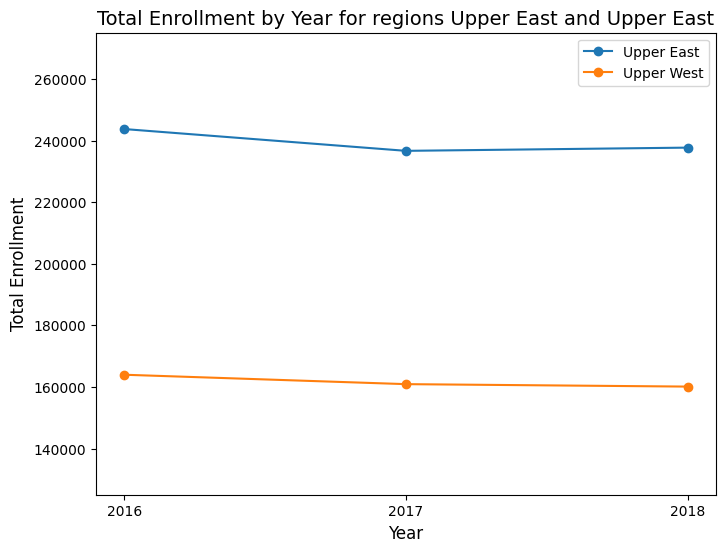

In [27]:
# Set 'Year' as a categorical type
enrolment['Year'] = enrolment['Year'].astype('category')

# Pivot the dataframe to make plotting easier: columns become regions, index is the year
pivot_df = enrolment.pivot(index='Year', columns='Region', values='total_Enr')

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(pivot_df.index.astype(str), pivot_df['UPPER EAST'], label='Upper East', marker='o')
plt.plot(pivot_df.index.astype(str), pivot_df['UPPER WEST'], label='Upper West', marker='o')
# pivot_df.plot(kind='line')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Enrollment', fontsize=12)
plt.ylim(125000, 275000)  # Setting y-axis limits from 1200 to 3000
plt.title('Total Enrollment by Year for regions Upper East and Upper East', fontsize=14)
plt.legend()

# Display the plot
# plt.tight_layout()
plt.show()

In [29]:
attendance = pd.DataFrame(
    {'Region': ['Upper East', 'Upper West'],
     'Attendance': [205897, 135259]
    }
)

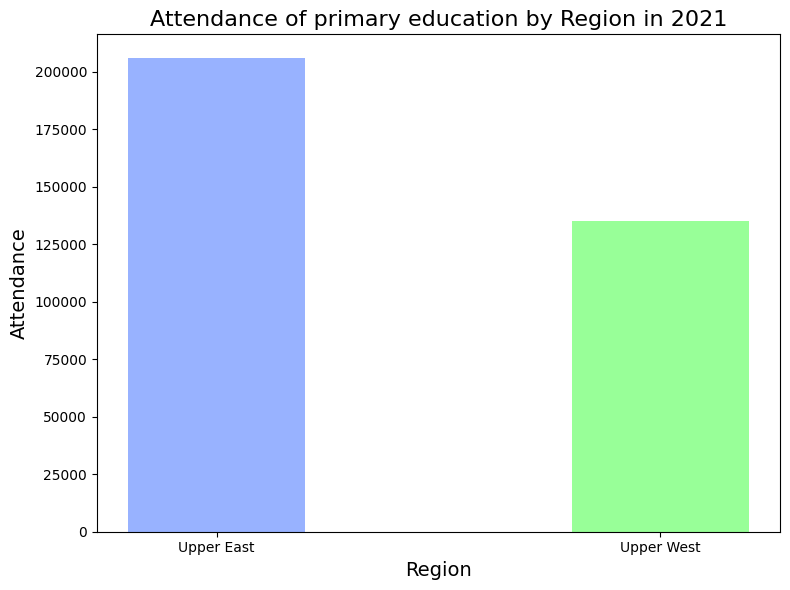

In [43]:
# Plot a bar chart with thinner bars
plt.figure(figsize=(8, 6))
plt.bar(attendance['Region'], attendance['Attendance'], color=[(0.2, 0.4, 1, 0.5), (0.2, 1, 0.2, 0.5)], width=0.4)  # Width adjusted to 0.4

# Add labels and title
plt.xlabel('Region', fontsize=14)
plt.ylabel('Attendance', fontsize=14)
plt.title('Attendance of primary education by Region in 2021', fontsize=16)

# Display the plot
plt.tight_layout()
plt.savefig('attendance_by_region.png')  # Save the plot
plt.show()

In [38]:
completion = pd.DataFrame(
    {'Region': ['Upper East', 'Upper West'],
     'Attendance': [55, 53]
    }
)

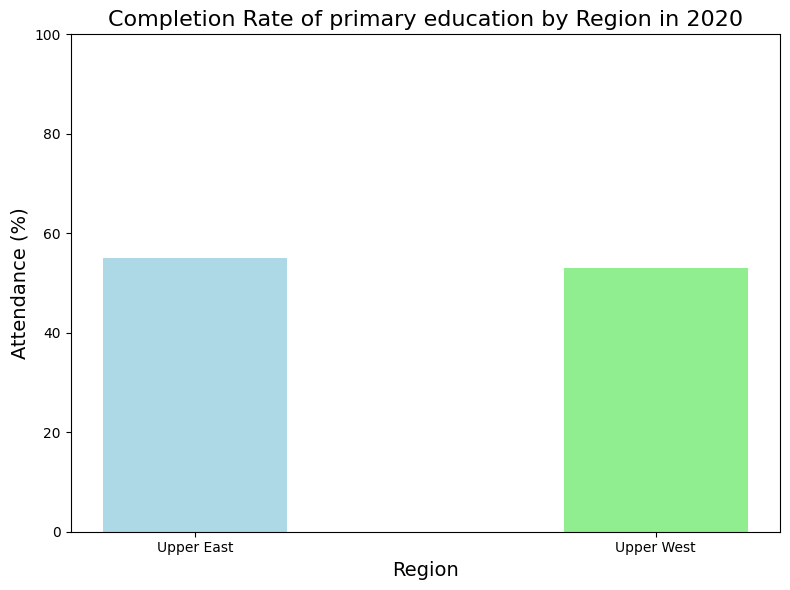

In [49]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
plt.bar(completion['Region'], completion['Attendance'], color=['lightblue', 'lightgreen'], width=0.4)

# Add labels and title
plt.xlabel('Region', fontsize=14)
plt.ylabel('Attendance (%)', fontsize=14)  # Indicating percentage in y-label
plt.title('Completion Rate of primary education by Region in 2020', fontsize=16)

# Set y-axis limit for percentage (0 to 100%)
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()
plt.savefig('completion_rate_by_region.png')
plt.show()